This notebook explores LDA as it relates to uncovering hidden structure in a collection of texts (wikipedia articles).  The information and the code are repurposed through some online articles [end-to-end topic modeling](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0), [How to build topic models](https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6and) and SIADS 543 unsupervised learning lecture notebooks and homework assignments.

In [146]:
# import some necessary libararies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision = 3)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [147]:
df = pd.read_pickle("data/features.pkl")

In [148]:
df.head()

,original_text,label,preprocessed,word_count,avg_word_count,syllable_count,uncommon,difficult_words,stem,discourse,cohesive_features,flesch,dale,mcalpine,nouns_adjs,normalized
0,There is manuscript evidence that Austen conti...,1,"[there, is, manuscript, evidence, that, austen...",35,4.485714,1.371429,14,7,there is manuscript evid that austen continu t...,4,2,52.87,11.24,48.0,0.228571,there is manuscript evidence that austen conti...
1,"In a remarkable comparative analysis , Mandaea...",1,"[in, a, remarkable, comparative, analysis, man...",19,6.000000,1.789474,14,8,there is manuscript evid that austen continu t...,2,1,35.27,14.55,23.0,0.315789,in a remarkable comparative analysis mandaean ...
2,"Before Persephone was released to Hermes , who...",1,"[before, persephone, was, released, to, hermes...",40,4.725000,1.400000,15,9,there is manuscript evid that austen continu t...,7,3,47.80,11.15,57.0,0.175000,before persephone was released to hermes who h...
3,Cogeneration plants are commonly found in dist...,1,"[cogeneration, plants, are, commonly, found, i...",32,6.281250,1.781250,22,14,there is manuscript evid that austen continu t...,0,1,22.08,14.60,38.0,0.593750,cogeneration plants are commonly found in dist...
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"[geneva, is, the, city, in, switzerland, after...",20,4.650000,1.350000,7,4,there is manuscript evid that austen continu t...,0,2,68.10,8.58,29.0,0.400000,geneva is the city in switzerland after zürich...


In [149]:
# Import stopwords with scikit-learn
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS
#remove stop words to reduce number of features. Stop words rarely contribute to topics
df['no_stop']= df['preprocessed'].apply(lambda x:' '.join([token for token in x if token not in stop])) 

In [166]:
# create the corpus
documents_train = [text for text in df['no_stop']]

## The choice of text processing has a significant impact on final classification performance

- The way text is represented has a major impact on classification performance.
- Text representation is a function of the many different parameter settings for Vectorizer objects in scikit-learn.

Due to time and resource constraints, not much experimentation and hyperparameter tuning has been performed. We set values that we thought our memory can handle

## Important parameters

Reference: [Basics of Countvectorizer](https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)

#### Min_df

Document frequency counts the number of documents in the dataset (aka rows or entries) that have the particular word. When building the vocabulary Min_df ignores terms that have a document frequency strictly *lower* than the given threshold. It helps eliminate words (names for instance) that appear in only 1 or 2 documents, as they do not provide enough information on the entire dataset as a whole but only a couple of particular documents. 

min_df can take absolute values(1,2,3..) or a value representing a percentage of documents(0.30, ignore words appearing in 30% of documents)

#### Max_df

Ignores words that occur frequently. These words could be like the word ‘the’ that occur in every document and does not provide and valuable information to our text classification or any other machine learning model and can be safely ignored. Max_df looks at how many documents contain the word and if it exceeds the max_df threshold then it is eliminated from the sparse matrix. This parameter can again 2 types of values, percentage and absolute.

#### max_features

The CountVectorizer will select terms that occur most frequently. It takes absolute values so if we set the ‘max_features = 100’, it will select the 100 most common words in the data.

In [167]:
# reference https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
tf_vectorizer = CountVectorizer(max_df=0.9, stop_words='english', min_df= 10, max_features = 1000) 
# remove words that appear in more than 90% of documents. and 
tf_documents = tf_vectorizer.fit_transform(documents_train)
tf_feature_names = tf_vectorizer.get_feature_names()

# Build the LDA model

In [133]:
def LDA_model(n_topics, X):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model = lda.fit(X)
    return lda_model

# Evalute LDA models using Log Likelihood and Perplexity

In [137]:
range_n_clusters = list(range(2,15))
log_likelihood_list = []
perplexity_list = []
X= tf_documents

# Iterating through cluster numbers
for n_clusters in range_n_clusters:
    lda_model = LDA_model(n_clusters, X)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For n_clusters =", n_clusters,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For n_clusters =", n_clusters,"The perplexity is :", perplexity)

For n_clusters = 2 The log likelihood is : -11803745.593960786
For n_clusters = 2 The perplexity is : 698.0422821106683
For n_clusters = 3 The log likelihood is : -11814554.141945887
For n_clusters = 3 The perplexity is : 702.2404438732452
For n_clusters = 4 The log likelihood is : -11743204.083803842
For n_clusters = 4 The perplexity is : 674.9870433353021
For n_clusters = 5 The log likelihood is : -11661525.940980803
For n_clusters = 5 The perplexity is : 645.0846157690455
For n_clusters = 6 The log likelihood is : -11629026.74638533
For n_clusters = 6 The perplexity is : 633.5583793935546
For n_clusters = 7 The log likelihood is : -11604557.073010718
For n_clusters = 7 The perplexity is : 625.0160211472455
For n_clusters = 8 The log likelihood is : -11607459.658093978
For n_clusters = 8 The perplexity is : 626.0232616836282
For n_clusters = 9 The log likelihood is : -11601504.816867504
For n_clusters = 9 The perplexity is : 623.958590564595
For n_clusters = 10 The log likelihood is 

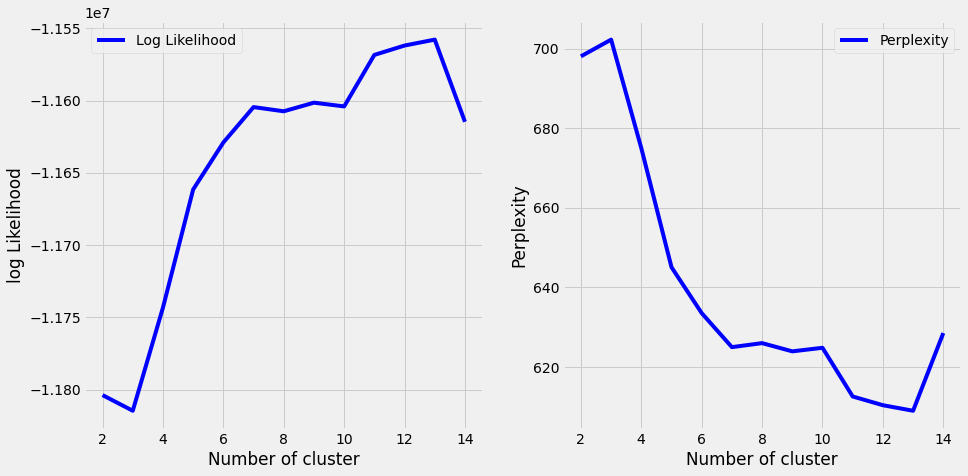

In [138]:
# Plot LDA Log Likelihood and Perplexity
# to determine optimal cluster number

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range_n_clusters, log_likelihood_list,'b-',label='Log Likelihood')
plt.xlabel("Number of cluster")
plt.ylabel("log Likelihood")
plt.legend()

fig.add_subplot(122)
plt.plot(range_n_clusters, perplexity_list,'b-',label='Perplexity')
plt.xlabel("Number of cluster")
plt.ylabel("Perplexity")
plt.legend()
plt.show()

# Hyperparameter tuning (alpha and beta)

Alpha is the parameter that tells LDA how many topics each document should be generated from. beta is the parameter that tells LDA how many topics each word should be in. You can play with these and you may get better results.

In [168]:
# LDA_model function that accepts doc_topic_prior (alpha)
X= tf_documents

def LDA_model(n_topics, X, doc_topic_prior):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, doc_topic_prior=doc_topic_prior)
    lda_model = lda.fit(X)
    return lda_model

# LDA Log Likelihood and Perplexity
n_clusters = 13
doc_topic_prior_rates = [0.1, 0.5, 1, 5, 10, 20, 30]

log_likelihood_list = []
perplexity_list = []

# Iterating through decay rates
for doc_topic_prior in doc_topic_prior_rates:
    lda_model = LDA_model(n_clusters, X, doc_topic_prior)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For doc_topic_prior =", doc_topic_prior,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For doc_topic_prior =", doc_topic_prior,"The perplexity is :", perplexity)

For doc_topic_prior = 0.1 The log likelihood is : -11578903.389362283
For doc_topic_prior = 0.1 The perplexity is : 616.1839704699119
For doc_topic_prior = 0.5 The log likelihood is : -11648626.62431351
For doc_topic_prior = 0.5 The perplexity is : 640.4848281907788
For doc_topic_prior = 1 The log likelihood is : -12071909.353473458
For doc_topic_prior = 1 The perplexity is : 810.0103063539816
For doc_topic_prior = 5 The log likelihood is : -12070038.99167609
For doc_topic_prior = 5 The perplexity is : 809.170269667314
For doc_topic_prior = 10 The log likelihood is : -11989170.828226062
For doc_topic_prior = 10 The perplexity is : 773.6709937084443
For doc_topic_prior = 20 The log likelihood is : -11948198.861394301
For doc_topic_prior = 20 The perplexity is : 756.2840135657116
For doc_topic_prior = 30 The log likelihood is : -11934465.123041319
For doc_topic_prior = 30 The perplexity is : 750.5438048818517


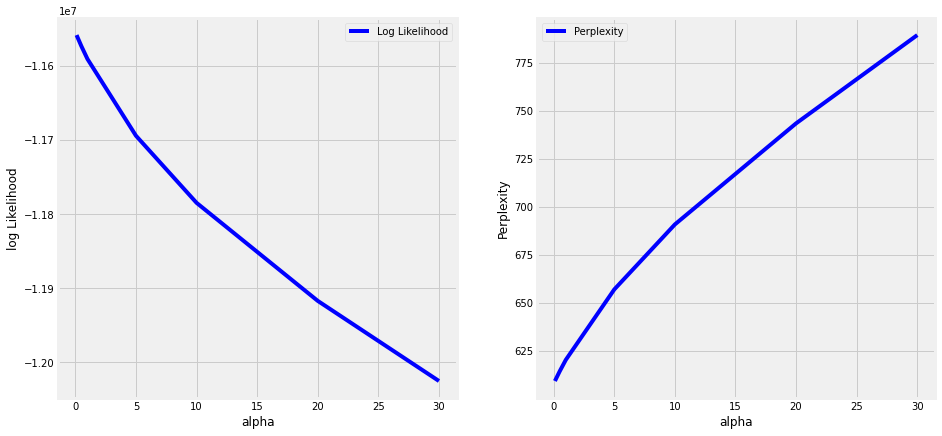

In [171]:
# Plot LDA Log Likelihood and Perplexity
# to determine optimal cluster number

fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(doc_topic_prior_rates, log_likelihood_list,'b-',label='Log Likelihood')
plt.xlabel("alpha")
plt.ylabel("log Likelihood")
plt.legend()

fig.add_subplot(122)
plt.plot(doc_topic_prior_rates, perplexity_list,'b-',label='Perplexity')
plt.xlabel("alpha")
plt.ylabel("Perplexity")
plt.legend()
plt.show()

In [169]:
# LDA_model function to accept topic_word_prior (beta)
def LDA_model(n_topics, X, topic_word_prior):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42, topic_word_prior=topic_word_prior)
    lda_model = lda.fit(X)
    return lda_model

# LDA Log Likelihood and Perplexity

n_clusters = 13
topic_word_prior_rates = [0.1, 0.5, 1, 5, 10, 20, 30]

log_likelihood_list = []
perplexity_list = []


for topic_word_prior in topic_word_prior_rates:
    lda_model = LDA_model(n_clusters, X, topic_word_prior)

# Log Likelyhood: Higher the better
    l_likelihood = lda_model.score(X)
    log_likelihood_list.append(l_likelihood)
    print("For topic_word_prior =", topic_word_prior,"The log likelihood is :", l_likelihood)

# Perplexity: Lower the better
    perplexity = lda_model.perplexity(X)
    perplexity_list.append(perplexity)
    print("For topic_word_prior =", topic_word_prior,"The perplexity is :", perplexity)

For topic_word_prior = 0.1 The log likelihood is : -11558281.513709428
For topic_word_prior = 0.1 The perplexity is : 609.1748408927455
For topic_word_prior = 0.5 The log likelihood is : -11573363.778114595
For topic_word_prior = 0.5 The perplexity is : 614.2932387755136
For topic_word_prior = 1 The log likelihood is : -11590608.606256468
For topic_word_prior = 1 The perplexity is : 620.1982542963758
For topic_word_prior = 5 The log likelihood is : -11694155.172825817
For topic_word_prior = 5 The perplexity is : 656.8679319394457
For topic_word_prior = 10 The log likelihood is : -11784733.910925226
For topic_word_prior = 10 The perplexity is : 690.7187356629369
For topic_word_prior = 20 The log likelihood is : -11917109.48993272
For topic_word_prior = 20 The perplexity is : 743.3520510759125
For topic_word_prior = 30 The log likelihood is : -12025285.212803176
For topic_word_prior = 30 The perplexity is : 789.3277468231496


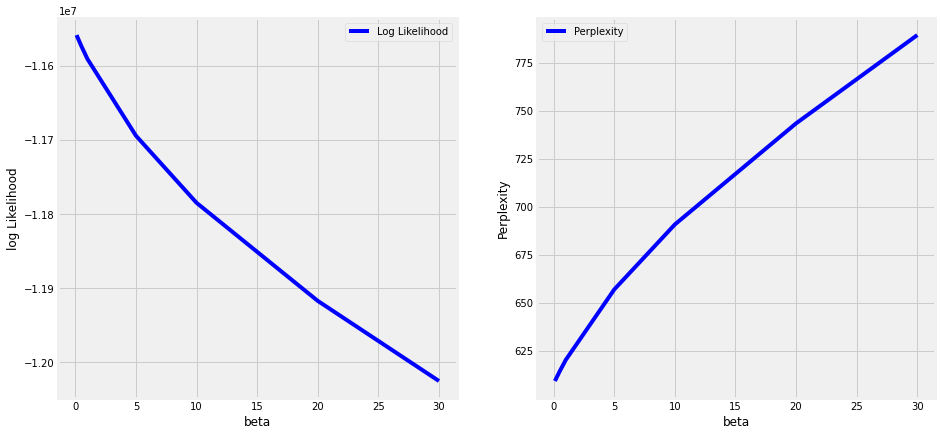

In [170]:
# Plot LDA Log Likelihood and Perplexity

fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(topic_word_prior_rates, log_likelihood_list,'b-',label='Log Likelihood')
plt.xlabel("beta")
plt.ylabel("log Likelihood")
plt.legend()

fig.add_subplot(122)
plt.plot(topic_word_prior_rates, perplexity_list,'b-',label='Perplexity')
plt.xlabel("beta")
plt.ylabel("Perplexity")
plt.legend()
plt.show()

# Display top words in each topic

In [174]:
num_top_words = 13

def display_topics(model, feature_names, no_top_words):
    """takes the model components generated by LDA
    dump the top words by weight for each topic.
    """
    topics =[]
    for topic_idx, topic in enumerate(model.components_):
        term_list = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append(term_list)
    return topics

display_topics(lda,tf_feature_names, num_top_words)

[['united',
  'city',
  'states',
  'county',
  'people',
  'population',
  'largest',
  'area',
  'capital',
  'state',
  'kingdom',
  'church',
  'total'],
 ['group',
  'la',
  'germany',
  'band',
  'place',
  'german',
  'rock',
  'river',
  'formed',
  'western',
  'west',
  'took',
  'said'],
 ['national',
  'international',
  'line',
  'team',
  'died',
  'age',
  'famous',
  'station',
  'started',
  'left',
  'father',
  'battle',
  'house'],
 ['born',
  'american',
  'album',
  'march',
  'university',
  'january',
  'july',
  'english',
  'october',
  'released',
  'september',
  'ndash',
  'april'],
 ['district',
  'republic',
  'government',
  'history',
  'century',
  'municipality',
  'british',
  'switzerland',
  'period',
  'order',
  'canton',
  'pakistan',
  'old'],
 ['used',
  'number',
  'different',
  'written',
  'party',
  'song',
  'member',
  'power',
  'countries',
  'european',
  'minister',
  'published',
  'political'],
 ['world',
  'football',
  'player',

# Topic coherence

One measure of topic model quality that is used (to determine the optimal number of topics for a corpus is *topic coherence*) This is a measure of how semantically related the top terms in a topic model are. 

- Low coherence: tend to be filled with seemingly random words and hard to interpret
- High coherence: tend to indicate a clear semantic theme that's easily interpreted

Word embeddings are an ideal tool for computing topic coherence because they have the ability to represent word semantics. 

We're going to use `text8_model` W2VTransformer object, which implements the word2vec embedding

In [50]:
#pip install "gensim==3.8.3"- use to this version of gensim

In [51]:
import pickle

f = open("data/text8_W2V.pickle", "rb")
text8_model = pickle.load(f)
f.close()

# Average semantic distance as a text coherence measure

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
def calc_avg_cosine(s):
    try:
        wordvecs=text8_model.transform(s)#For each input term, compute its word2vec embedding vector
    except KeyError:
        #print('term not found {}'.format(s))
        matrix= np.zeros(10)
    else:
        matrix=np.zeros([len(s),len(s)]) #create an empty array with dimension len(input)*len(input)
    
        for i in range(len(s)): #iterate over the rows
            for j in range(len(s)):#iterate over the columns
                if i==j: #if row index and column index match (i.e comparing the same word to itself)
                    matrix[i][j]=0 # set that value to 0
                else: #otherwise calculate the cosine similarity between all words and append to the matrix
                    v1 = np.array(wordvecs[i]).reshape(1,-1)
                    v2 = np.array(wordvecs[j]).reshape(1,-1)
                    sim = cosine_similarity(v1,v2)
                    matrix[i][j]= sim
                    
                
    return np.mean(matrix)

In [73]:
#display_topics(lda, features_tfidf, num_top_words)

In [71]:
scores =[]
for topic in display_topics(lda, features_tfidf, num_top_words):
    scores.append(calc_avg_cosine(topic))

In [72]:
print(scores)

[0.18844251058995723, 0.22881923768669366, 0.18896742030978203, 0.23224354784935713, 0.26277119332458826, 0.1510866433568299, 0.32901755705475805, 0.0, 0.1663243638537824, 0.1324111014790833]


In [79]:
def coherence_b():
    from sklearn.decomposition import LatentDirichletAllocation
    top=10
    HH=[]
    for terms in range(2,11):
        lda = LatentDirichletAllocation(n_components = terms, random_state=0)
        W= lda.fit(tfidf_documents)
        h = lda.components_
        HH.append(h)
        
    topics=[]
    for H in HH:
        tops=[]
        for each in H:
            top10_indexes=each.argsort()[::-1][:top]
            topi=[features_tfidf[each] for each in top10_indexes]
            tops.append(topi)
        topics.append(tops)
    
    medians=[]
    for eachlist in topics:
        scorelist=[]
        for each in eachlist:
            score=calc_avg_cosine(each)
            scorelist.append(score)
        medians.append(np.median(scorelist))
    
    return medians

In [80]:
coherence_b()

[0.1576924245734699,
 0.11390801172703505,
 0.12204309355001897,
 0.16601227690465747,
 0.21220865251030774,
 0.1433943632710725,
 0.1633485022885725,
 0.19491060564294457,
 0.18870496544986964]

#  Use GridSearch to determine the best LDA model (failed- ran for more than 24 hours with no output)

In [86]:
# from sklearn.model_selection import GridSearchCV
# #Define Search Param
# search_params = {'n_components': [2, 3, 4, 8, 10,13], 'learning_decay': [.5, .7, .9]}
# # Init the Model
# lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)
# # Do the Grid Search
# model.fit(tf_documents)
# GridSearchCV(cv=None, error_score='raise',
#        estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
#              evaluate_every=-1, learning_decay=0.7, learning_method=None,
#              learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
#              mean_change_tol=0.001, n_components=10, n_jobs=1,
#              n_topics=None, perp_tol=0.1, random_state=None,
#              topic_word_prior=None, total_samples=1000000.0, verbose=0),
#        fit_params=None, iid=True, n_jobs=1,
#        param_grid={'n_topics': [2,3,4,8,10,13], 'learning_decay': [0.5, 0.7, 0.9]},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring=None, verbose=0)

# Visualizing Topics with pyLDAvis

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [175]:
#pip install pyLDAvis
import spacy 
from spacy import displacy

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords

In [176]:
stop = stopwords.words('english')

In [177]:
df['no_stop']= df['preprocessed'].apply(lambda x: [item for item in x if item not in stop])

In [178]:
texts= df['no_stop']

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [179]:
lda_model = LdaModel(corpus=corpus, num_topics=13, id2word=dictionary)
lda_model.show_topics()

[(1,
  '0.014*"means" + 0.012*"century" + 0.012*"built" + 0.010*"get" + 0.010*"big" + 0.010*"loire" + 0.010*"pays" + 0.010*"minister" + 0.009*"company" + 0.009*"hockey"'),
 (6,
  '0.050*"city" + 0.035*"district" + 0.028*"part" + 0.028*"capital" + 0.026*"province" + 0.023*"island" + 0.022*"town" + 0.022*"northwest" + 0.020*"municipality" + 0.019*"state"'),
 (2,
  '0.027*"national" + 0.024*"team" + 0.021*"university" + 0.018*"played" + 0.013*"league" + 0.013*"first" + 0.012*"season" + 0.011*"one" + 0.010*"world" + 0.009*"football"'),
 (5,
  '0.015*"tropical" + 0.014*"church" + 0.013*"hurricane" + 0.013*"storm" + 0.013*"roman" + 0.013*"pakistan" + 0.010*"air" + 0.010*"village" + 0.010*"council" + 0.009*"black"'),
 (9,
  '0.080*"born" + 0.040*"football" + 0.039*"player" + 0.025*"former" + 0.024*"american" + 0.018*"september" + 0.017*"april" + 0.017*"may" + 0.017*"march" + 0.017*"july"'),
 (11,
  '0.021*"war" + 0.015*"king" + 0.014*"first" + 0.014*"started" + 0.014*"london" + 0.013*"ii" + 0

In [180]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
p =pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [181]:
pyLDAvis.save_html(p,'lda.html')

In [182]:
print(p)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.226811 -0.050899       1        1  11.259613
0      0.041530 -0.242499       2        1   9.058055
2     -0.050872  0.074678       3        1   8.920224
11     0.034752  0.140122       4        1   8.585522
4     -0.158941 -0.080045       5        1   8.078135
7     -0.188488 -0.025254       6        1   8.030894
9      0.200335  0.226975       7        1   8.010593
8     -0.018173  0.044911       8        1   8.006853
3      0.029754  0.216414       9        1   7.269819
1     -0.134585  0.014575      10        1   6.590651
5      0.035456  0.017640      11        1   6.069085
6      0.170688 -0.206403      12        1   5.189019
10     0.265357 -0.130216      13        1   4.931536, topic_info=            Term          Freq         Total Category  logprob  loglift
484         born  27649.000000  27649.000000  Default  30.0000  30.0000
99 